## Script for Dating Website

# Dating Website


<li>Each user has to fill an extensive questionaries to define ``dimensions of personality''.


<li>Based on these dimensions, the webpage <font color="red">estimates compatibility scores</font> associated to each possible couple.


<li>How can we match pairs to <font color="red">maximize global compatibility</font>?

<li> Let index $i$ represent women and $j$ represent men. Let $w_{ij}$ be the compatibility score between woman $i$ and man $j$.


 <li> <font color="blue">Decision variables:</font>

$$
x_{ij}=
\left\{\begin{array}{ll} 
1, & \text{if we match user $i$ and user $j$,}\\
0, & \text{if we do not match user  $i$ and user $j$}
\end{array} \right.\quad i=1,2,3 \quad j=1,2,3
$$

 <li> <font color="blue">Data:</font>  
  
$w_{ij}$ | $i=1$ | $i=2$ | $i=3$
 -------|---------------------
  $j=1$ | 1 | 3 | 5 
  $j=2$ | 4 | 2 | 2 
  $j=3$ | 1 | 5 | 3
  

<li><font color="blue">Formulation:</font>

\begin{align*}
\underset{x_{ij}}{\max} & \quad \sum_{i=1}^{n}\sum_{j=1}^{n}w_{ij}x_{ij}\\
\text{s.t.:}&\\
  &\sum_{i=1}^{n} x_{ij} =1 \quad \forall j\\
  &\sum_{j=1}^{n} x_{ij} = 1 \quad \forall i\\
  &x_{ij} \in \{0,1\} \quad \forall ij 
\end{align*}








In [15]:
import numpy as np
n=3; #women
m=3; #men
#w=np.array([[1, 4, 1],[3, 2, 5],[5, 2, 3]]);w
w=np.random.uniform(0,10,([n,m]));w

array([[ 8.72987501,  0.9856351 ,  2.83353406],
       [ 4.25220942,  2.19955362,  3.18825283],
       [ 6.47492484,  2.50943306,  1.05756451]])

In [16]:
from pyomo.environ import *
opt = SolverFactory("glpk")
from pyomo.opt import SolverFactory

model=AbstractModel()

model.I = RangeSet(1,n)
model.J = RangeSet(1,m)

model.x=Var(model.I,model.J,domain=Binary)

def obj_func(model):
    return sum(sum(model.x[i,j]*w[i-1,j-1] for i in model.I) for j in model.J)
model.OBJ = Objective(rule=obj_func, sense=maximize)

def const1(model,j):
    return sum(model.x[i,j] for i in model.I)==1
model.cons1=Constraint(model.J,rule=const1)

def const2(model,i):
    return sum(model.x[i,j] for j in model.J)==1
model.cons2=Constraint(model.I,rule=const2)

In [17]:
instance=model.create_instance()
results=opt.solve(instance)
print(results)
print(instance.OBJ())
print(instance.x[1,1].value)
a=instance.x[1,1].value
print(a)


Problem: 
- Name: unknown
  Lower bound: 14.4275608952
  Upper bound: 14.4275608952
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 10
  Number of nonzeros: 19
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.0160000324249
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

14.4275608952
1.0
1.0


In [19]:
OF_vec=np.zeros(10)
for cont in range(0,10):
    w=np.random.uniform(0,10,([n,m]))
    instance=model.create_instance() 
    opt.solve(instance)
    OF_vec[cont]=instance.OBJ()
print(OF_vec)
    

[ 18.34537607  26.34436549  15.84958026  21.75736834  24.46335496
  13.61576668  22.17875351  21.12932313  17.40423594  15.79620972]


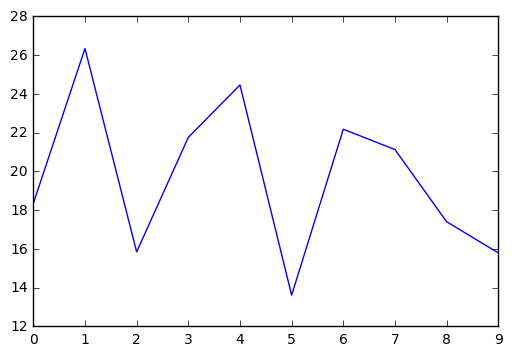

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(OF_vec)